### 학습목표
- 시각화 패키지 matlolib
- 서브 패키지   pyplot
- 고급 시각화 패키지 seaborn
- 분석된 내용을 시각화
- 지도 시각화 패키지 follum

In [1]:
# !pip install matpotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

### plot 유형
- line
- area
- surface
- bar
- his
- box
- etc ...

In [3]:
data = [0,1,2,3,4,5,6,7,8,9]

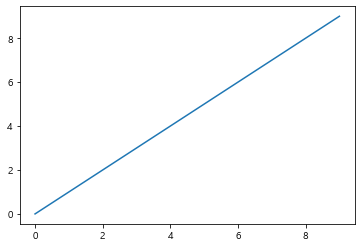

In [6]:
plt.figure() # 그래프를 시작하겠습니다
plt.plot(data)
plt.show()
plt.close()

In [2]:
# file read option
# path
# header
# skiprows
# encoding
# fillna

cityDF = pd.read_excel('./data/시도별 전출입 인구수.xlsx', header=0)
cityDF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [7]:
# 빈 칸을 앞에 있는 값으로 채워넣음
cityDF = cityDF.fillna(method = 'ffill')

In [11]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 서브셋을 만든다면?
mask = (cityDF['전출지별'] == '서울특별시') & (cityDF['전입지별'] != '서울특별시')
seoulDF = cityDF[mask]
seoulDF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [12]:
seoulDF.drop(['전출지별'], axis = 1, inplace = True)

In [13]:
# 원하는 열 인덱스 이름 변경
seoulDF.rename({'전입지별' : '전입지'}, axis=1, inplace=True)
seoulDF.head()

C:\Users\82102\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [14]:
# 전입지로 인덱스 설정
seoulDF.set_index('전입지', inplace = True)
seoulDF

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [90]:
# 전입 전출 이동
# 경기도 이동한 인구 데이터 값만 선택해서 시각화
datas = seoulDF.loc['경기도']

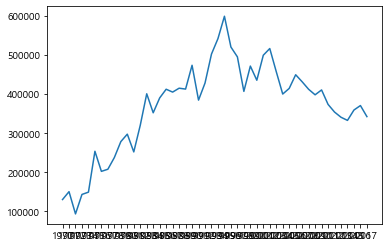

In [26]:
plt.figure()
plt.plot(datas.index, datas.values)
plt.show()
plt.close()

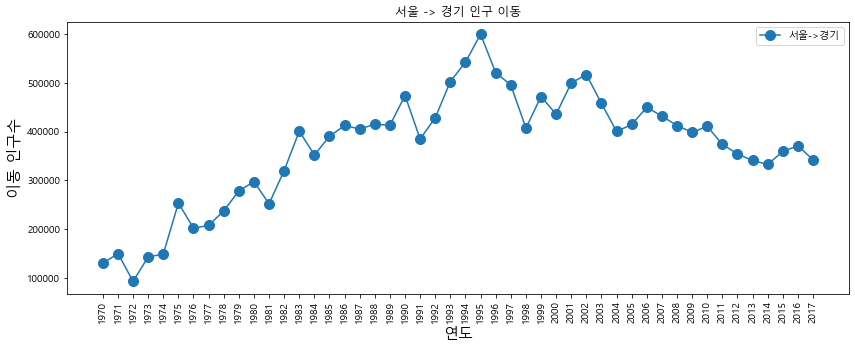

In [43]:
# 옵션 추가
plt.figure(figsize=(14,5))                     # 그림 사이즈
plt.plot(datas.index, datas.values, marker='o', markersize=10) # 선 스타일


plt.title('서울 -> 경기 인구 이동')            # 제목
plt.xlabel('연도', size=15)                    # x축 라벨링
plt.ylabel('이동 인구수',size=15)              # y축 라벨링
plt.xticks(rotation='vertical')                # x축 글자 vertical로 변경
plt.legend(labels=['서울->경기'], loc="best")  # 범례, 가장 좋은 위치를 찾아라(best)

plt.show()
plt.close()

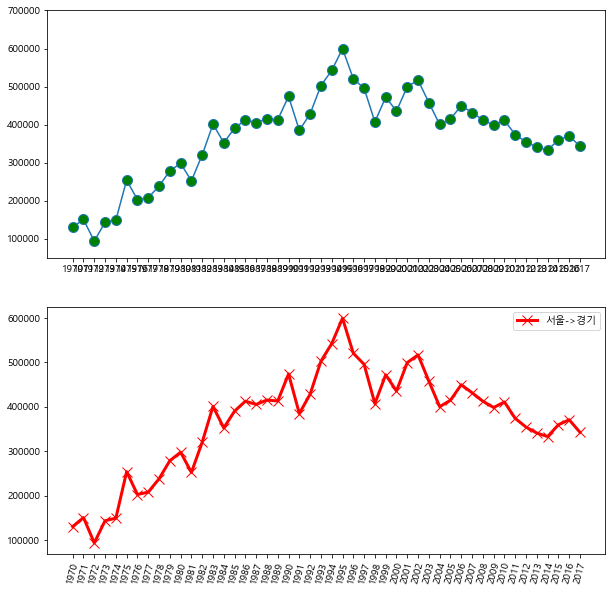

In [67]:
fig = plt.figure(figsize = (10,10))
ax01 = fig.add_subplot(2,1,1) # 2행 1열 1번쨰
ax02 = fig.add_subplot(2,1,2) # 2행 1열 2번째

# markder = p, +, *, . 등등
ax01.plot(datas,marker='o', markersize=10, markerfacecolor="green")
ax02.plot(datas,marker='x', markersize=10, color="red", linewidth=3)
ax02.legend(labels=['서울->경기'], loc='best') 

ax01.set_ylim(50000, 700000) # y축 범위 지정

ax02.set_xticklabels(datas.index, rotation=75) # x축 글자 각도

plt.show()
plt.close()

In [15]:
# 서울에서 충청남도, 경상북도, 강원도 이동한 인구 데이터 값 선택
dataDF =seoulDF.loc[['충청남도','경상북도','강원도']]

In [100]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plog[col_years, dataDF.loc['충청남도',:], markder='o', label='서울->충청']
ax.plog[col_years, dataDF.loc['경상북도',:], markder='o', label='서울->경상']
ax.plog[col_years, dataDF.loc['강원도',:], markder='o', label='서울->강원']

ax.legend(loc="best")
plt.show()
plt.close()

SyntaxError: invalid syntax (<ipython-input-100-ab80d621ce82>, line 4)

- bar plot

In [16]:
y = [2,3,1]
x = np.arange(len(y))
x

array([0, 1, 2])

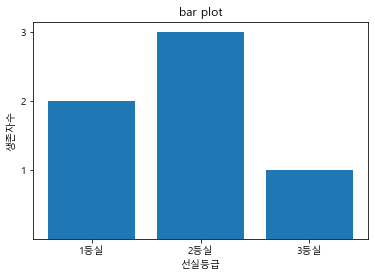

In [25]:
xlabel = ['1등실', '2등실', '3등실']
plt.figure()
plt.bar(x,y)
# plt.barh(x,y) # horizon

plt.title('bar plot')
plt.xlabel('선실등급')
plt.ylabel('생존자수')

plt.xticks(x,xlabel)
plt.yticks(y)

plt.show()
plt.close()

In [30]:
col_years = list(map(str, range(2010,2018)))

In [124]:
# 서울에서 충정남도, 경상북도 , 강원도, 전라남도 로 이동한 인구 데이터의 프레임을 만들자
# 조건 2010 ~ 2017
dataDF = seoulDF.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
dataDF

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [120]:
dataDF = dataDF.T

In [121]:
dataDF.index = dataDF.index.map(int)

In [113]:
dataDF.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

<Figure size 432x288 with 0 Axes>

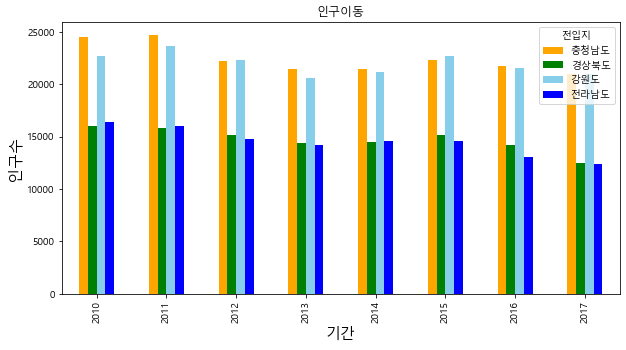

In [60]:
plt.figure()
dataDF.plot(kind='bar',
            figsize=(10,5),
           color=['orange','green','skyblue','blue'])

plt.title("인구이동")
plt.xlabel('기간',size=15)
plt.ylabel('인구수',size=15)



plt.show()
plt.close()

In [125]:
# 2010- 2017년 이동 인구 수를 합계하여 새로운 열(합계)을 추가하여 
# 가장 큰 값으로 정렬하고
# 수평 막대 그래프를 시각화 한다면?

dataDF['인구합계'] = dataDF.sum(axis=1).astype(int)
dataDF = dataDF.sort_values(by="인구합계", ascending=False)
dataDF


,2010,2011,2012,2013,2014,2015,2016,2017,인구합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035


In [127]:
sumDF = dataDF['인구합계']
sumDF

전입지
충청남도    179533
강원도     175731
경상북도    117740
전라남도    116035
Name: 인구합계, dtype: int32

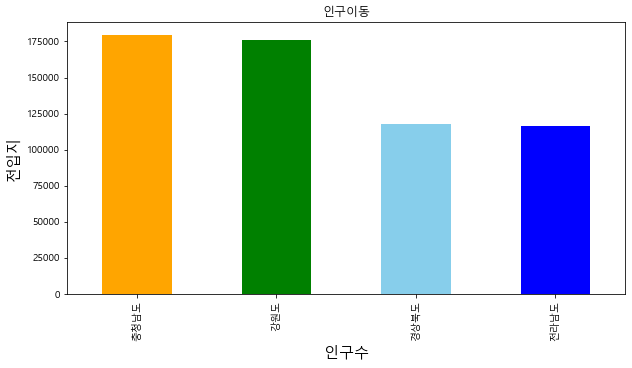

In [128]:
plt.figure()
sumDF.plot(kind='bar',
            figsize=(10,5),
           color=['orange','green','skyblue','blue'])

plt.title("인구이동")
plt.xlabel('인구수',size=15)
plt.ylabel('전입지',size=15)

plt.show()
plt.close()

In [ ]:
# iris 시각화

In [129]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [131]:
iris.rename(columns = {iris.columns[0]:'SL',
           iris.columns[1]:'SW',
           iris.columns[2]:'PL',
           iris.columns[3]:'PW',
           iris.columns[4]:'Y'}, inplace=True)
iris

,SL,SW,PL,PW,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [133]:
# 종을 기준으로 그룹화하여 각 그룹의 평균을 구해본다면?
iris_mean_df = iris.groupby(iris.Y).mean()
iris_mean_df

,SL,SW,PL,PW
Y,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [139]:
iris_t = iris_mean_df.T

<Figure size 432x288 with 0 Axes>

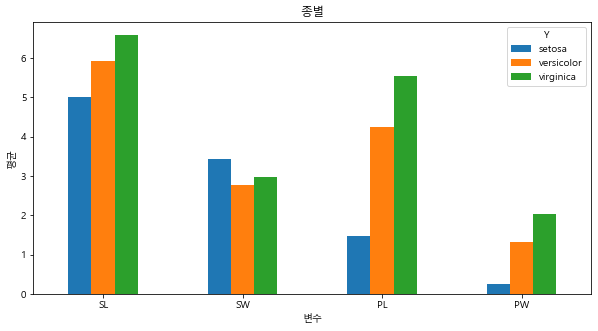

In [146]:
plt.figure()
iris_t.plot(kind='bar',
           figsize=(10,5))

plt.title('종별')
plt.xlabel('변수')
plt.ylabel('평균')

plt.xticks(rotation='horizontal') 

plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

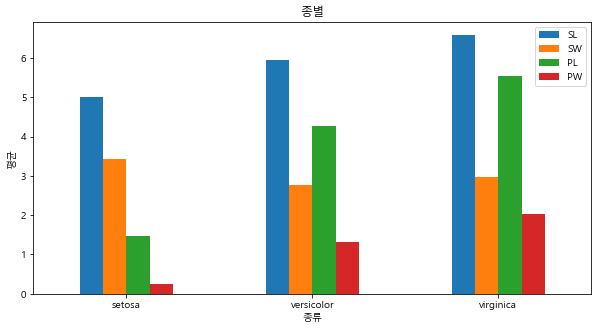

In [148]:
plt.figure()
iris_mean_df.plot(kind='bar',
           figsize=(10,5))

plt.title('종별')
plt.xlabel('종류')
plt.ylabel('평균')

plt.xticks(rotation='horizontal') 

plt.show()
plt.close()

- box plot

In [151]:
boxDF = iris[['SL','Y']]
boxDF

,SL,Y
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


<Figure size 432x288 with 0 Axes>

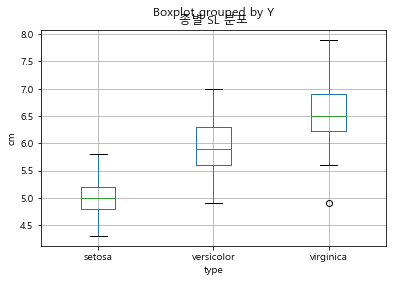

In [155]:
# 종별 SL 에 대한 분포를 확인하고 싶으면? 

plt.figure()
boxDF.boxplot(by='Y')

plt.title('종별 SL 분포')
plt.xlabel('type')
plt.ylabel('cm')

plt.xticks(rotation='horizontal') 

plt.show()
plt.close()